# [**Tracé des courbes de validation**](https://nbviewer.org/github/Franck-PepperLabs/pepper_dsia_skl_doc_fr/blob/main/docs/examples/3_model_selection/plot_validation_curve.ipynb)<br/>([_Plotting Validation Curves_](https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html))

Dans ce graphique, vous pouvez voir les scores d'entraînement et les scores de validation d'un SVM pour différentes valeurs du paramètre du noyau gamma. Pour des valeurs très faibles de gamma, vous pouvez constater que à la fois le score d'entraînement et le score de validation sont faibles. Cela s'appelle le sous-ajustement (underfitting). Des valeurs moyennes de gamma entraîneront des scores élevés pour les deux, c'est-à-dire que le classificateur fonctionne assez bien. Si gamma est trop élevé, le classificateur sur-ajustera les données d'entraînement, ce qui signifie que le score d'entraînement est bon, mais le score de validation est faible. Cela est connu sous le nom de sur-ajustement (overfitting).

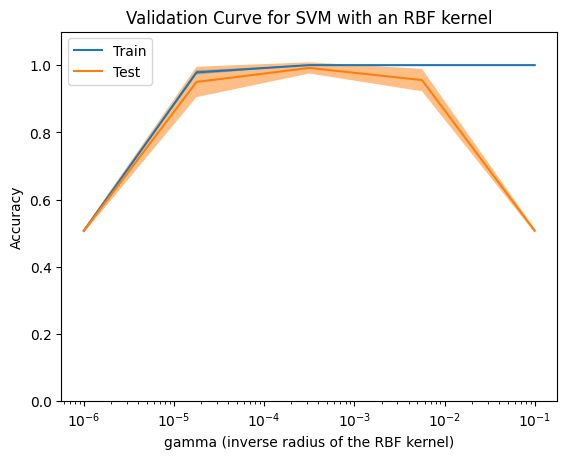

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.model_selection import ValidationCurveDisplay
from sklearn.svm import SVC

X, y = load_digits(return_X_y=True)
subset_mask = np.isin(y, [1, 2])  # binary classification: 1 vs 2
X, y = X[subset_mask], y[subset_mask]

disp = ValidationCurveDisplay.from_estimator(
    SVC(),
    X,
    y,
    param_name="gamma",
    param_range=np.logspace(-6, -1, 5),
    score_type="both",
    n_jobs=2,
    score_name="Accuracy",
)
disp.ax_.set_title("Validation Curve for SVM with an RBF kernel")
disp.ax_.set_xlabel(r"gamma (inverse radius of the RBF kernel)")
disp.ax_.set_ylim(0.0, 1.1)
plt.show()